In [2]:
# HIDDEN
Base.displaysize() = (5, 80)
using DataFrames
using CSV

## Visualizing Quantitative Data

We generally use different types of charts to visualize quantitative (numerical) data and qualitative (ordinal or nominal) data.

For quantitative data, we most often use histograms, box plots, and scatter plots.

We can use the [StatsPlots plotting library](https://github.com/JuliaPlots/StatsPlots.jl) to create these plots in Julia. We will use a dataset containing information about passengers aboard the Titanic available [here](https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv).

In [3]:
# Import statsplots and apply plotting style
using StatsPlots
gr(size=(400,300))

Plots.GRBackend()

In [4]:
# Load the dataset and skip missing data
ti = CSV.read("data/titanic.csv", ignoreemptylines=true)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who
,Int64,Int64,String,Float64,Int64,Int64,Float64,String,String,String
1,1,1,female,38.0,1,0,71.2833,C,First,woman
2,1,1,female,35.0,1,0,53.1,S,First,woman
3,0,1,male,54.0,0,0,51.8625,S,First,man
4,1,3,female,4.0,1,1,16.7,S,Third,child
5,1,1,female,58.0,0,0,26.55,S,First,woman
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮


### Histograms

We can see that the dataset contains one row for every passenger. Each row includes the age of the passenger and the amount the passenger paid for a ticket. Let's visualize the ages using a histogram. We can use StatsPlot's `histogram` function, along with the `@df` notation that allows us to pass the columns of a DataFrame directly to the plotting function:

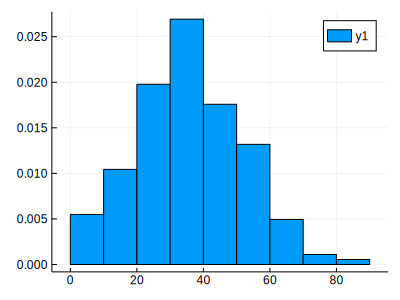

In [4]:
@df ti histogram(:age, norm=true)

We can also display the normal distribution curve overlaying our histogram. To plot additional functions on top of your primary figure use the `!` operator:

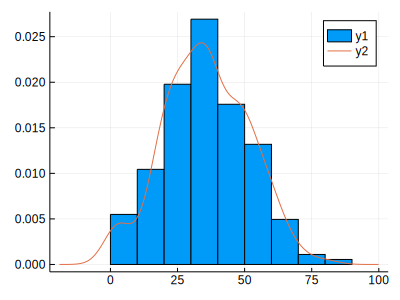

In [5]:
@df ti histogram(:age, norm=true)
@df ti density!(:age)

We can add a custom rugplot to mark each individual point on the x-axis. Set `legend=false` when you don't need additional information to distinguish each additional plot, making the figure cleaner:

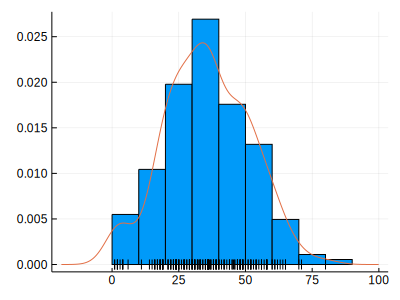

In [5]:
@df ti histogram(:age, norm=true, legend=false)
@df ti density!(:age, legend=false)
@df ti scatter!(:age, :age * 0, marker=:vline, legend=false)

We can also plot the distribution itself. Adjusting the number of bins shows that there were a number of children on board.

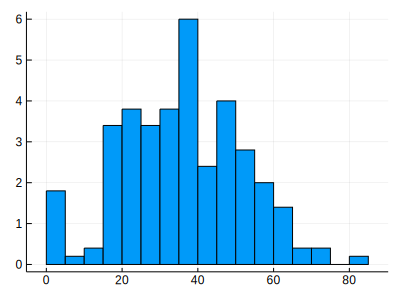

In [11]:
@df ti histogram(:age, norm=:density, bins=30, legend=false)

### Box plots

Box plots are a convenient way to see where most of the data lie. Typically, we use the 25th and 75th percentiles of the data as the start and endpoints of the box and draw a line within the box for the 50th percentile (the median). We draw two "whiskers" that extend to show the the remaining data except outliers, which are marked as individual points outside the whiskers.

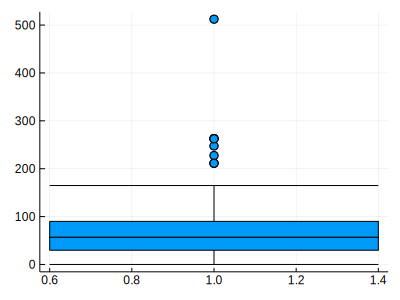

In [13]:
@df ti boxplot(:fare, legend=false)

We typically use the Inter-Quartile Range (IQR) to determine which points are considered outliers for the box plot. The IQR is the difference between the 75th percentile of the data and the 25th percentile.

In [14]:
using StatsBase
iqr(ti.fare)

60.3

Values greater than 1.5 $\times$ IQR above the 75th percentile and less than 1.5 $\times$ IQR below the 25th percentile are considered outliers and we can see them marked individually on the boxplot above:

In [40]:
lower = percentile(ti.fare, 25)
lower_cutoff = lower - 1.5 * iqr(ti.fare)
upper = percentile(ti.fare, 75)
upper_cutoff = upper + 1.5 * iqr(ti.fare)
(upper_cutoff, lower_cutoff)

(180.45, -60.749999999999986)

Although histograms show the entire distribution at once, box plots are often easier to understand when we split the data by different categories. For example, we can make one box plot for each passenger type:

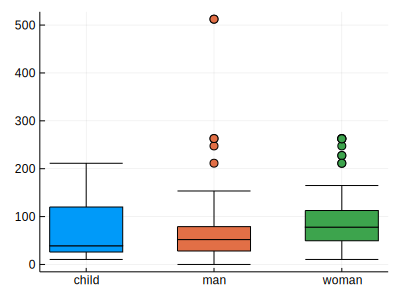

In [20]:
@df ti boxplot(:who, :fare, group=:who, legend=false)

The separate box plots are much easier to understand than the overlaid histogram below which plots the same data:

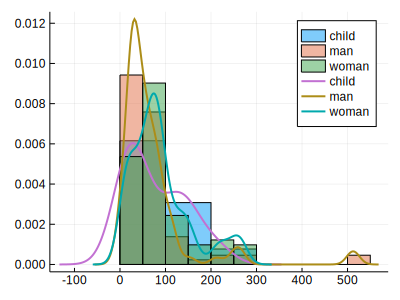

In [32]:
@df ti histogram(:fare, group=:who, norm=:pdf, fillalpha = 0.5)
@df ti density!(:fare, group=:who, linewidth=2)

### Brief Aside on Using StatsPlots

You may have noticed that the `histogram` call to stack plots for the `:who` column was simpler than the equivalent code to make an overlaid histogram with normal distribution and rug plot. When the column is categorical (the `:who` column contained `"woman"`, `"man"`, and `"child"`), you can pass it to the `group` attribute and StatsPlots will split the data by category before plotting. This means we don't have to filter out each category ourselves.

### Scatter Plots

Scatter plots are used to compare two quantitative variables. We can compare the `age` and `fare` columns of our Titanic dataset using a scatter plot.

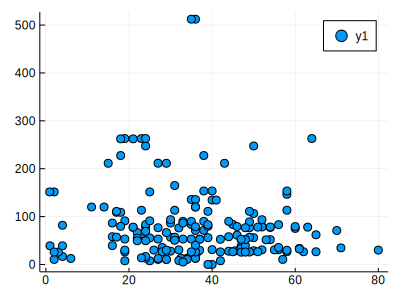

In [151]:
@df ti scatter(:age, :fare)

By default StatsPlots will not show the regression line to fit our scatter plot, but we can visualize it by passing the attribute `regression=true`.

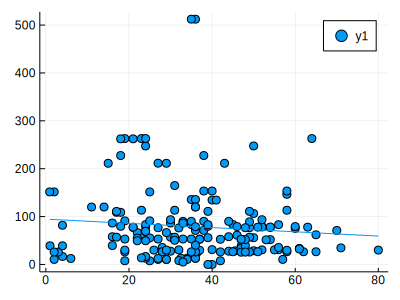

In [149]:
@df ti scatter(:age, :fare, regression=true)

You can check the complete list of available attributes at the [documentation](http://docs.juliaplots.org/latest/attributes/#series).

We can color the points using a categorical variable. Let's use the `group` attribute once more:

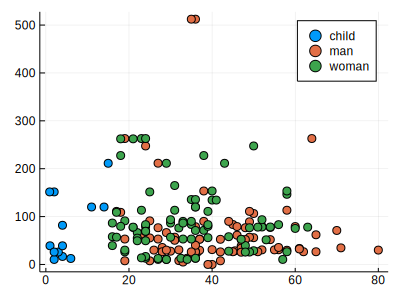

In [150]:
@df ti scatter(:age, :fare, group=:who)

From this plot we can see that all passengers below the age of 18 or so were marked as `child`. There doesn't seem to be a noticable split between male and female passenger fares, although the two most expensive tickets were purchased by males.